## Kobe Bryant Shot Selection Project

### Team Members: Sudarshan Guttula, Stanley Do


### Splitting data by season and making predictions using KNN

In [1]:
# Importing

In [2]:
import numpy as np
import pandas as pd

# Read our data and drop all NAN
kobe_data = pd.read_csv('data.csv').dropna()
display(kobe_data.head(10))

# Identify our target label
target = ['shot_made_flag']

# Features that are redundant or have no meaning
unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id']

# Features that we will use
feature_cols = [feature for feature in kobe_data.columns if feature not in unused_features]

# Self explanatory
categorical_features = ['action_type', 'combined_shot_type','game_date', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent']
numerical_features = ['lat', 'lon', 'loc_x', 'loc_y', 'minutes_remaining', 'period', 'playoffs', 'seconds_remaining', 'shot_distance','shot_made_flag']

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,102,29600027,33.9283,-140,116,-118.4098,0,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/3/1996,LAL vs. MIN,MIN,22902
1,Jump Shot,Jump Shot,127,29600031,33.9473,-131,97,-118.4008,10,2,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/5/1996,LAL @ NYK,NYK,22903
2,Jump Shot,Jump Shot,124,29600044,33.8633,-142,181,-118.4118,8,2,...,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/6/1996,LAL @ CHH,CHA,22904
3,Jump Shot,Jump Shot,144,29600044,34.0443,0,0,-118.2698,6,2,...,3PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,11/6/1996,LAL @ CHH,CHA,22905
4,Jump Shot,Jump Shot,151,29600044,33.9063,-10,138,-118.2798,5,2,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,11/6/1996,LAL @ CHH,CHA,22906
6,Jump Shot,Jump Shot,226,29600057,33.8213,-64,223,-118.3338,2,2,...,3PT Field Goal,Center(C),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/8/1996,LAL @ TOR,TOR,22908
8,Jump Shot,Jump Shot,334,29600057,33.8673,-79,177,-118.3488,1,3,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/8/1996,LAL @ TOR,TOR,22910
9,Jump Shot,Jump Shot,337,29600057,33.8373,-103,207,-118.3728,1,3,...,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/8/1996,LAL @ TOR,TOR,22911
10,Driving Layup Shot,Layup,352,29600057,34.0443,0,0,-118.2698,0,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,11/8/1996,LAL @ TOR,TOR,22912
11,Jump Shot,Jump Shot,380,29600057,33.8693,-155,175,-118.4248,9,4,...,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,11/8/1996,LAL @ TOR,TOR,22913


### Seperate data into many data sets by season and applying One-Hot Encoding.

In [3]:
# Separate the data so that we only use used data.
used_data = kobe_data[feature_cols]

# Get all unique values in season column
seasons = used_data.season.unique()
print(len(seasons))
# Create a dict that stores the separated datasets with the season as the key.
seasons_dict = {}
seasons_sizes = {}
seasons_sizes_list = []

# Select rows whos column name equals the season, and store the data into a separate DF.
for season in seasons:
    
    # Create the new data sets by values in the column.
    new_df = pd.DataFrame(used_data.loc[used_data['season'] == season])

    # Since we know what season it is already, we can drop the season col.
    new_df.drop('season', inplace=True, axis=1)
    seasons_sizes[season] = new_df.shape[0]
    seasons_sizes_list.append(seasons_sizes[season])
    
    processed_df = pd.get_dummies(new_df[categorical_features]).join(new_df[numerical_features])
    
    # Assign the new dataset to the dictionary with the season as the key.
    seasons_dict[season] = processed_df
    
    print('Season: ' + season)
    display(seasons_dict[season].head(5))
    print()

20
Season: 1996-97


,action_type_Driving Dunk Shot,action_type_Driving Layup Shot,action_type_Dunk Shot,action_type_Jump Shot,action_type_Layup Shot,action_type_Running Jump Shot,action_type_Slam Dunk Shot,action_type_Tip Shot,combined_shot_type_Dunk,combined_shot_type_Jump Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
0,0,0,0,1,0,0,0,0,0,1,...,33.9283,-118.4098,-140,116,0,1,0,42,18,0.0
1,0,0,0,1,0,0,0,0,0,1,...,33.9473,-118.4008,-131,97,10,2,0,8,16,0.0
2,0,0,0,1,0,0,0,0,0,1,...,33.8633,-118.4118,-142,181,8,2,0,37,23,1.0
3,0,0,0,1,0,0,0,0,0,1,...,34.0443,-118.2698,0,0,6,2,0,34,0,0.0
4,0,0,0,1,0,0,0,0,0,1,...,33.9063,-118.2798,-10,138,5,2,0,27,13,1.0



Season: 1997-98


,action_type_Driving Dunk Shot,action_type_Driving Layup Shot,action_type_Dunk Shot,action_type_Hook Shot,action_type_Jump Shot,action_type_Layup Shot,action_type_Running Jump Shot,action_type_Slam Dunk Shot,action_type_Tip Shot,combined_shot_type_Dunk,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
477,0,0,0,0,0,0,0,1,0,1,...,34.0443,-118.2698,0,0,4,1,0,33,0,1.0
478,0,0,0,0,1,0,0,0,0,0,...,33.9663,-118.2318,38,78,3,1,0,30,8,0.0
479,0,0,0,0,0,1,0,0,0,0,...,34.0443,-118.2698,0,0,0,1,0,50,0,0.0
480,0,0,0,0,1,0,0,0,0,0,...,33.9333,-118.3268,-57,111,0,1,0,2,12,0.0
481,0,0,0,0,1,0,0,0,0,0,...,33.7983,-118.3568,-87,246,5,2,0,37,26,0.0



Season: 1998-99


,action_type_Driving Dunk Shot,action_type_Driving Layup Shot,action_type_Dunk Shot,action_type_Hook Shot,action_type_Jump Shot,action_type_Layup Shot,action_type_Running Jump Shot,action_type_Slam Dunk Shot,action_type_Tip Shot,combined_shot_type_Dunk,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
1466,0,0,0,0,1,0,0,0,0,0,...,34.0113,-118.1398,130,33,9,1,0,40,13,0.0
1467,0,0,0,0,0,0,1,0,0,0,...,34.0343,-118.1338,136,10,9,1,0,38,13,1.0
1468,0,0,0,0,1,0,0,0,0,0,...,33.8433,-118.3058,-36,201,9,1,0,7,20,0.0
1470,0,0,0,0,0,1,0,0,0,0,...,34.0443,-118.2698,0,0,6,1,0,18,0,1.0
1471,0,0,0,0,1,0,0,0,0,0,...,33.9613,-118.4558,-186,83,5,1,0,23,20,0.0



Season: 1999-00


,action_type_Driving Dunk Shot,action_type_Driving Layup Shot,action_type_Dunk Shot,action_type_Hook Shot,action_type_Jump Shot,action_type_Layup Shot,action_type_Running Jump Shot,action_type_Slam Dunk Shot,action_type_Tip Shot,combined_shot_type_Dunk,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
2387,0,0,0,0,1,0,0,0,0,0,...,34.0413,-118.3658,-96,3,1,1,0,23,9,0.0
2388,0,0,0,0,0,0,1,0,0,0,...,34.0003,-118.3208,-51,44,0,1,0,15,6,1.0
2389,0,0,0,0,1,0,0,0,0,0,...,33.9383,-118.2108,59,106,11,2,0,24,12,0.0
2390,0,0,0,0,0,0,0,0,1,0,...,34.0443,-118.2698,0,0,11,2,0,6,0,1.0
2391,0,0,0,0,1,0,0,0,0,0,...,33.8153,-118.3828,-113,229,8,2,0,3,25,0.0



Season: 2000-01


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Shot,action_type_Driving Hook Shot,action_type_Driving Layup Shot,action_type_Dunk Shot,action_type_Finger Roll Shot,action_type_Jump Shot,action_type_Layup Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
3965,0,0,0,0,0,0,0,0,1,0,...,34.0443,-118.4268,-157,0,10,1,0,22,15,0.0
3966,0,0,0,0,0,0,0,0,1,0,...,33.9093,-118.3708,-101,135,7,1,0,45,16,1.0
3967,0,0,0,0,0,0,0,0,1,0,...,33.8693,-118.1318,138,175,6,1,0,52,22,0.0
3968,0,0,1,0,0,0,0,0,0,0,...,34.0443,-118.2698,0,0,6,2,0,19,0,1.0
3969,0,0,0,0,0,0,0,0,1,0,...,34.0553,-118.4148,-145,-11,9,3,0,32,14,0.0



Season: 2001-02


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Shot,action_type_Driving Layup Shot,action_type_Dunk Shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Shot,action_type_Follow Up Dunk Shot,action_type_Hook Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
5832,0,0,0,0,0,0,0,0,0,0,...,33.8753,-118.3538,-84,169,10,1,0,34,18,0.0
5833,0,0,0,0,0,0,0,0,0,0,...,33.9153,-118.1848,85,129,10,1,0,6,15,1.0
5834,0,0,0,0,0,1,0,0,0,0,...,34.0443,-118.2698,0,0,9,1,0,42,0,1.0
5835,0,0,0,0,0,0,0,0,0,0,...,33.9093,-118.2328,37,135,7,1,0,54,13,0.0
5836,0,0,0,0,0,0,0,0,0,0,...,34.0293,-118.1968,73,15,6,1,0,21,7,0.0



Season: 2002-03


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Shot,action_type_Driving Layup Shot,action_type_Dunk Shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Shot,action_type_Follow Up Dunk Shot,action_type_Hook Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
7860,0,0,0,0,0,0,0,0,0,0,...,33.9393,-118.3868,-117,105,11,1,0,27,15,0.0
7861,0,0,0,0,0,0,0,0,0,0,...,33.9553,-118.3898,-120,89,10,1,0,57,14,1.0
7862,0,0,0,0,0,0,0,0,0,0,...,33.9673,-118.2288,41,77,10,1,0,18,8,0.0
7863,0,0,0,0,0,0,0,0,0,0,...,34.0443,-118.2698,0,0,10,1,0,12,0,0.0
7864,0,0,0,0,0,0,0,0,0,0,...,33.9933,-118.2318,38,51,5,1,0,55,6,0.0



Season: 2003-04


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Shot,action_type_Driving Layup Shot,action_type_Dunk Shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Shot,action_type_Follow Up Dunk Shot,action_type_Hook Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
10101,0,0,0,0,0,0,1,0,0,0,...,34.0313,-118.4098,-140,13,8,1,0,37,14,0.0
10102,0,0,0,0,0,0,0,0,0,0,...,33.9063,-118.4028,-133,138,6,1,0,33,19,1.0
10103,0,0,0,0,0,0,0,0,0,0,...,33.9033,-118.1298,140,141,4,1,0,31,19,1.0
10104,0,0,0,0,0,0,0,0,0,0,...,33.9143,-118.1368,133,130,11,2,0,23,18,0.0
10105,0,0,0,0,0,0,0,0,0,0,...,33.9123,-118.2638,6,132,9,2,0,5,13,0.0



Season: 2004-05


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Shot,action_type_Driving Hook Shot,action_type_Driving Layup Shot,action_type_Dunk Shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Shot,action_type_Follow Up Dunk Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
11739,0,0,0,0,0,0,0,0,0,0,...,34.0473,-118.3748,-105,-3,10,1,0,20,10,0.0
11740,0,0,0,0,0,0,0,0,0,0,...,34.0423,-118.1778,92,2,2,1,0,20,9,0.0
11741,0,0,0,0,0,0,0,0,0,0,...,33.7973,-118.1828,87,247,6,2,0,42,26,0.0
11742,0,0,0,0,0,0,0,0,0,0,...,33.8353,-118.1258,144,209,1,2,0,51,25,1.0
11743,0,0,0,0,0,0,0,0,0,0,...,34.0533,-118.4258,-156,-9,11,3,0,43,15,1.0



Season: 2005-06


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Shot,action_type_Driving Hook Shot,action_type_Driving Layup Shot,action_type_Dunk Shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Shot,action_type_Hook Bank Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
13063,0,0,0,0,0,1,0,0,0,0,...,34.0443,-118.2698,0,0,10,1,0,43,0,0.0
13064,0,0,0,0,0,0,0,0,0,0,...,33.8453,-118.1908,79,199,9,1,0,56,21,1.0
13066,0,0,0,0,0,0,0,0,0,0,...,33.9833,-118.1188,151,61,7,1,0,32,16,1.0
13069,0,0,0,0,0,0,0,0,0,0,...,34.0443,-118.2698,0,0,3,1,0,50,0,1.0
13070,0,0,0,0,0,0,0,0,0,0,...,34.0443,-118.2698,0,0,7,2,0,43,0,1.0



Season: 2006-07


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Shot,action_type_Driving Hook Shot,action_type_Driving Layup Shot,action_type_Dunk Shot,action_type_Fadeaway Jump Shot,action_type_Finger Roll Shot,action_type_Hook Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
15381,0,0,0,0,0,0,0,0,0,0,...,34.0443,-118.2698,0,0,10,1,0,37,0,1.0
15382,0,0,0,0,0,0,0,0,0,0,...,33.9963,-118.4558,-186,48,7,1,0,21,19,1.0
15383,0,0,0,0,0,0,1,0,0,0,...,34.0443,-118.2698,0,0,3,1,0,55,0,1.0
15384,0,0,0,0,0,0,0,0,0,0,...,33.9673,-118.1948,75,77,6,2,0,31,10,0.0
15385,0,0,0,0,0,0,0,0,0,0,...,34.0443,-118.2698,0,0,4,2,0,8,0,0.0



Season: 2007-08


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Hook Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
17268,0,0,0,0,0,0,0,0,0,0,...,33.8353,-118.2158,54,209,11,1,0,29,21,0.0
17269,0,0,0,0,0,0,0,0,0,0,...,34.0443,-118.2698,0,0,9,1,0,19,0,0.0
17270,0,0,0,0,0,0,0,0,0,0,...,34.0443,-118.2698,0,0,9,1,0,1,0,1.0
17271,0,0,0,0,0,0,0,0,0,0,...,33.8433,-118.2188,51,201,7,1,0,56,20,1.0
17272,0,0,0,0,0,0,0,0,0,0,...,33.8073,-118.1488,121,237,6,1,0,6,26,0.0



Season: 2008-09


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,action_type_Dunk Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
19421,0,0,0,0,0,0,0,0,0,0,...,34.0243,-118.1038,166,20,6,1,0,5,16,0.0
19422,0,0,0,0,0,0,1,0,0,0,...,34.0443,-118.2698,0,0,5,1,0,4,0,1.0
19423,0,0,0,0,0,0,0,0,0,0,...,34.0443,-118.2698,0,0,4,1,0,40,0,0.0
19427,0,0,0,0,0,0,0,0,0,0,...,34.0053,-118.1078,162,39,1,2,0,0,16,0.0
19430,0,0,0,0,0,0,0,0,0,0,...,33.8113,-118.1818,88,233,9,3,0,0,24,1.0



Season: 2009-10


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,action_type_Dunk Shot,action_type_Fadeaway Bank shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
21663,0,0,0,0,0,0,0,0,0,0,...,34.0443,-118.2698,0,0,11,1,0,0,0,0.0
21664,0,0,0,0,0,0,0,0,0,0,...,34.0443,-118.2698,0,0,10,1,0,59,0,1.0
21665,0,0,0,0,0,0,0,0,0,0,...,34.0503,-118.4498,-180,-6,10,1,0,22,18,1.0
21667,0,0,0,0,0,0,0,1,0,0,...,34.0443,-118.2698,0,0,6,1,0,15,0,1.0
21668,0,0,0,0,0,0,0,0,0,0,...,33.9703,-118.1318,138,74,5,1,0,41,15,1.0



Season: 2010-11


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,action_type_Dunk Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
23743,0,0,0,0,0,0,0,0,0,0,...,33.9363,-118.3678,-98,108,9,1,0,38,14,1.0
23744,0,0,0,0,0,0,0,0,0,0,...,33.8603,-118.3448,-75,184,7,1,0,41,19,0.0
23745,0,0,0,0,0,0,0,0,0,0,...,33.9423,-118.3888,-119,102,6,1,0,26,15,0.0
23746,0,0,0,0,0,0,0,0,0,0,...,33.8383,-118.1868,83,206,4,1,0,6,22,0.0
23748,0,0,0,0,0,0,0,0,0,0,...,33.9313,-118.2598,10,113,8,2,0,40,11,1.0



Season: 2011-12


,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Hook Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,action_type_Dunk Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
25568,0,0,0,0,0,0,0,0,0,0,...,34.0433,-118.2498,20,1,6,1,0,37,2,1.0
25569,0,0,0,0,0,0,0,0,0,0,...,34.0073,-118.1698,100,37,5,1,0,57,10,0.0
25571,0,0,0,0,0,0,0,0,0,0,...,33.8253,-118.2878,-18,219,3,1,0,47,21,0.0
25572,0,0,0,0,0,0,0,0,0,0,...,33.9703,-118.1188,151,74,2,1,0,20,16,0.0
25573,0,0,0,0,0,0,0,0,0,0,...,33.9043,-118.1808,89,140,4,2,0,47,16,1.0



Season: 2012-13


,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Hook Shot,action_type_Driving Jump shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Driving Slam Dunk Shot,action_type_Dunk Shot,action_type_Fadeaway Bank shot,action_type_Fadeaway Jump Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
27205,0,0,0,0,0,0,0,0,0,0,...,34.0253,-118.2778,-8,19,9,1,0,14,2,1.0
27206,0,0,0,0,0,0,0,0,0,0,...,33.9203,-118.2628,7,124,7,1,0,57,12,0.0
27207,0,0,0,0,1,0,0,0,0,0,...,34.0273,-118.2528,17,17,7,1,0,7,2,1.0
27208,0,0,0,0,0,0,0,0,0,0,...,34.0183,-118.2188,51,26,6,1,0,4,5,1.0
27209,0,0,0,0,0,0,0,0,0,0,...,34.0403,-118.4188,-149,4,5,2,0,26,14,1.0



Season: 2013-14


,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Fadeaway Jump Shot,action_type_Hook Shot,action_type_Jump Bank Shot,action_type_Jump Shot,action_type_Layup Shot,action_type_Pullup Bank shot,action_type_Pullup Jump shot,action_type_Running Jump Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
28798,0,0,0,0,0,1,0,0,0,0,...,34.0083,-118.2168,53,36,10,1,0,13,6,0.0
28799,0,0,0,0,0,1,0,0,0,0,...,33.8303,-118.3378,-68,214,6,1,0,48,22,0.0
28800,0,0,0,0,1,0,0,0,0,0,...,33.9663,-118.2968,-27,78,5,2,0,13,8,1.0
28801,0,0,0,0,0,1,0,0,0,0,...,34.0253,-118.0848,185,19,2,2,0,4,18,1.0
28802,0,0,0,0,0,1,0,0,0,0,...,33.8963,-118.2028,67,148,0,2,0,2,16,0.0



Season: 2014-15


,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Hook Shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Dunk Shot,action_type_Fadeaway Bank shot,action_type_Fadeaway Jump Shot,action_type_Floating Jump shot,action_type_Jump Bank Shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
28871,0,0,0,0,0,0,0,0,0,0,...,34.0493,-118.2638,6,-5,9,1,0,2,0,0.0
28872,0,0,0,0,0,0,0,0,0,0,...,33.9533,-118.4578,-188,91,8,1,0,38,20,1.0
28873,0,0,0,0,0,0,0,0,0,0,...,33.9263,-118.3078,-38,118,8,1,0,2,12,0.0
28875,0,0,0,0,0,0,0,0,0,0,...,33.8433,-118.3238,-54,201,6,1,0,13,20,0.0
28876,0,0,0,0,0,0,0,0,0,0,...,33.9093,-118.3758,-106,135,5,1,0,35,17,0.0



Season: 2015-16


,action_type_Cutting Layup Shot,action_type_Driving Dunk Shot,action_type_Driving Finger Roll Layup Shot,action_type_Driving Floating Bank Jump Shot,action_type_Driving Floating Jump Shot,action_type_Driving Hook Shot,action_type_Driving Layup Shot,action_type_Driving Reverse Layup Shot,action_type_Fadeaway Jump Shot,action_type_Floating Jump shot,...,lat,lon,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
29584,0,0,0,0,0,0,0,0,0,0,...,33.7873,-118.2808,-11,257,11,1,0,17,25,0.0
29585,0,0,0,0,0,0,0,0,0,0,...,33.9923,-118.1218,148,52,8,1,0,54,15,1.0
29586,0,0,0,0,0,0,0,0,0,0,...,33.9203,-118.1328,137,124,8,1,0,31,18,0.0
29587,0,0,0,0,0,0,0,0,0,0,...,33.8803,-118.1678,102,164,8,1,0,7,19,0.0
29588,0,0,0,0,0,0,0,0,0,0,...,33.9203,-118.1728,97,124,7,1,0,15,15,0.0


## Now that we've separated our data by seasons, and processed the data using OHE, we can use KNN classifier for each season with different values of K.

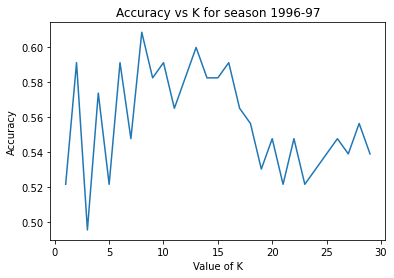

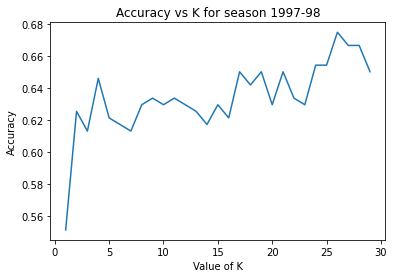

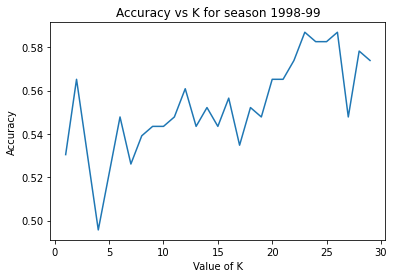

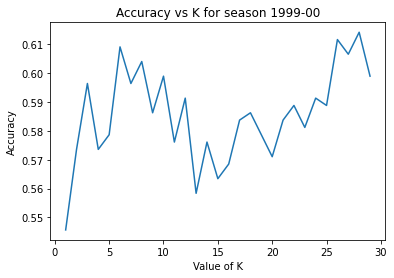

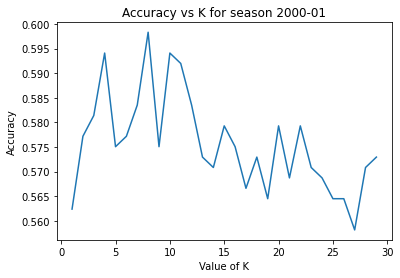

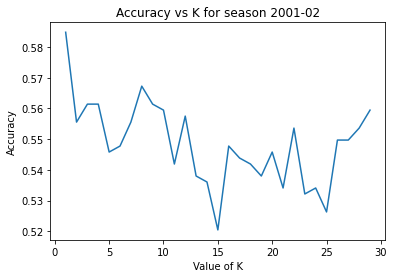

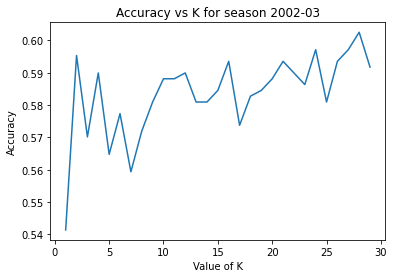

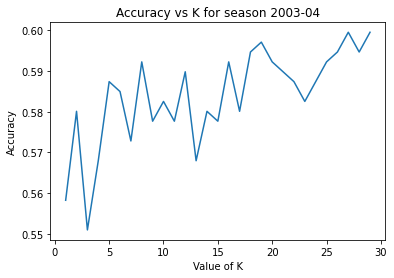

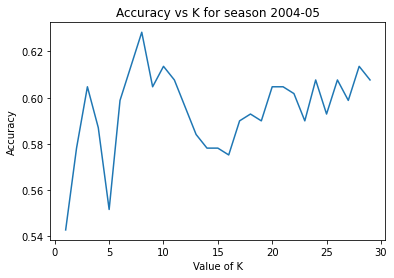

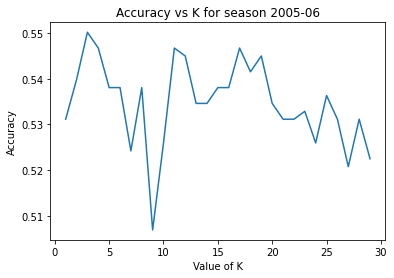

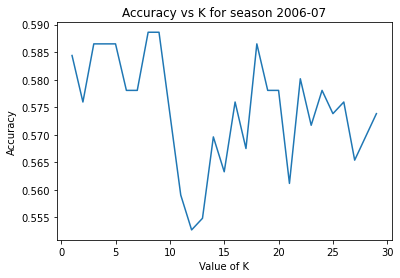

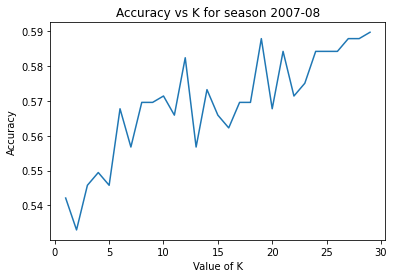

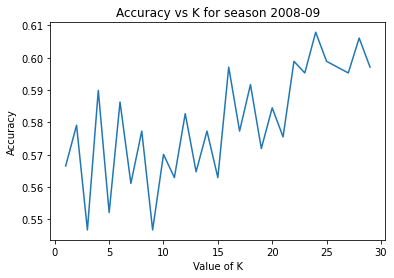

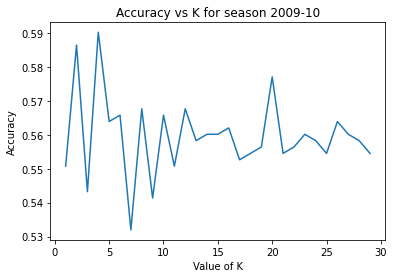

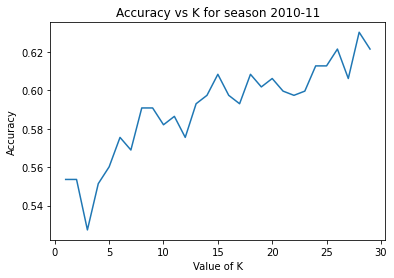

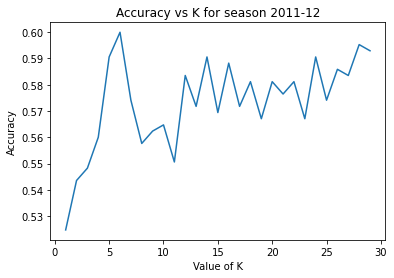

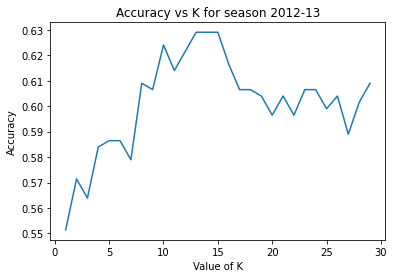

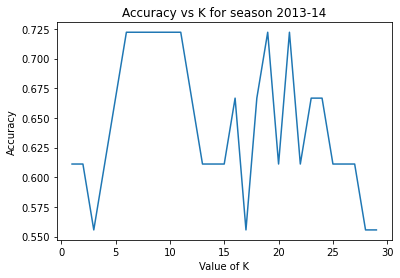

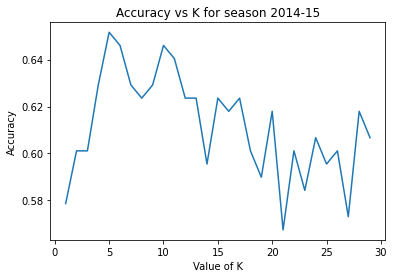

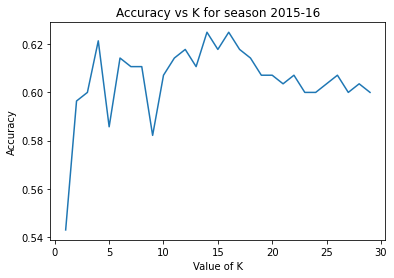

In [4]:
# Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

# Range(1,100) is [1,2,3,...,99], so don't use <1 for MIN
MIN_K = 1
MAX_K = 30
STEP = 1

TEST_SIZE = 0.3

# Dictionary that stores all of the prediction accuracy and value of K used.
seasons_predictions = {}

for season in seasons:
    scores_k = []
    scores_acc = []
    processed_df = seasons_dict[season]
    y = processed_df[target].values.ravel()
    X = processed_df.drop('shot_made_flag', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(processed_df, y, test_size=TEST_SIZE, random_state=1)
    
    for k in range(MIN_K, MAX_K, STEP):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        scores_k.append(k)
        scores_acc.append(accuracy_score(y_test, y_predict))
        
    seasons_predictions[season] = [scores_k, scores_acc]
    plt.plot(scores_k, scores_acc)
    plt.xlabel('Value of K')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs K for season ' + season)
    plt.show()
    

## We can use this data to pick an optimal value for K for each season.

In [5]:
seasons_best_k = {}
best_accuracies = []

for season in seasons:
    kvals, accuracies = seasons_predictions[season]
    top_score = [0,0]
    for i in range(len(kvals)):
        if accuracies[i] > top_score[1]:
            top_score[1] = accuracies[i]
            top_score[0] = kvals[i]
    seasons_best_k[season] = top_score
    best_accuracies.append(top_score[1])
    print("Season: ", season, ", Best K=", top_score[0], ", with accuracy:", top_score[1], "# shots taken: ", seasons_sizes[season])
 

Season:  1996-97 , Best K= 8 , with accuracy: 0.6086956521739131 # shots taken:  383
Season:  1997-98 , Best K= 26 , with accuracy: 0.6748971193415638 # shots taken:  810
Season:  1998-99 , Best K= 23 , with accuracy: 0.5869565217391305 # shots taken:  765
Season:  1999-00 , Best K= 28 , with accuracy: 0.6142131979695431 # shots taken:  1312
Season:  2000-01 , Best K= 8 , with accuracy: 0.5983086680761099 # shots taken:  1575
Season:  2001-02 , Best K= 1 , with accuracy: 0.5847953216374269 # shots taken:  1708
Season:  2002-03 , Best K= 28 , with accuracy: 0.6025179856115108 # shots taken:  1852
Season:  2003-04 , Best K= 27 , with accuracy: 0.5995145631067961 # shots taken:  1371
Season:  2004-05 , Best K= 8 , with accuracy: 0.6283185840707964 # shots taken:  1127
Season:  2005-06 , Best K= 3 , with accuracy: 0.5501730103806228 # shots taken:  1924
Season:  2006-07 , Best K= 8 , with accuracy: 0.5886075949367089 # shots taken:  1579
Season:  2007-08 , Best K= 29 , with accuracy: 0.589

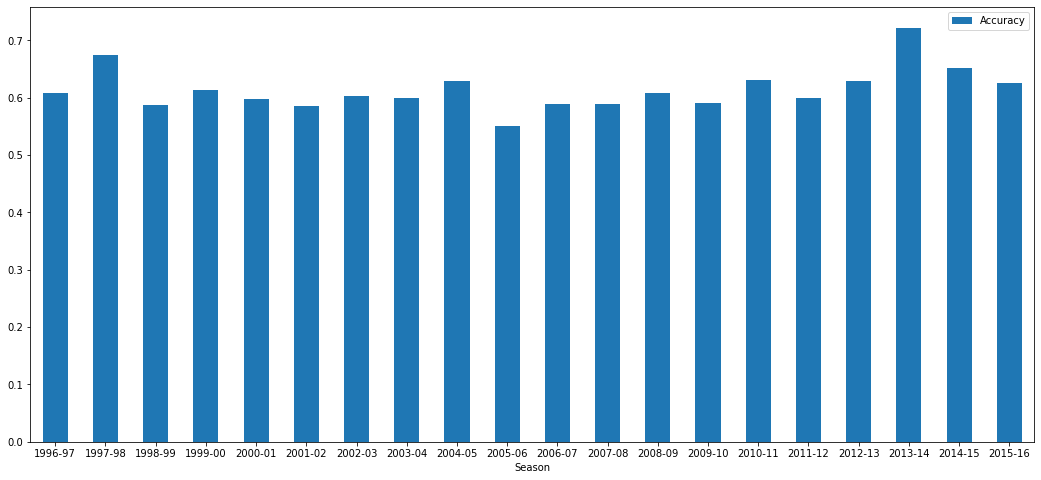

In [6]:
df = pd.DataFrame({'Season': seasons, 'Accuracy': best_accuracies})
ax = df.plot.bar(x='Season', y='Accuracy', rot=0, figsize=(18,8))

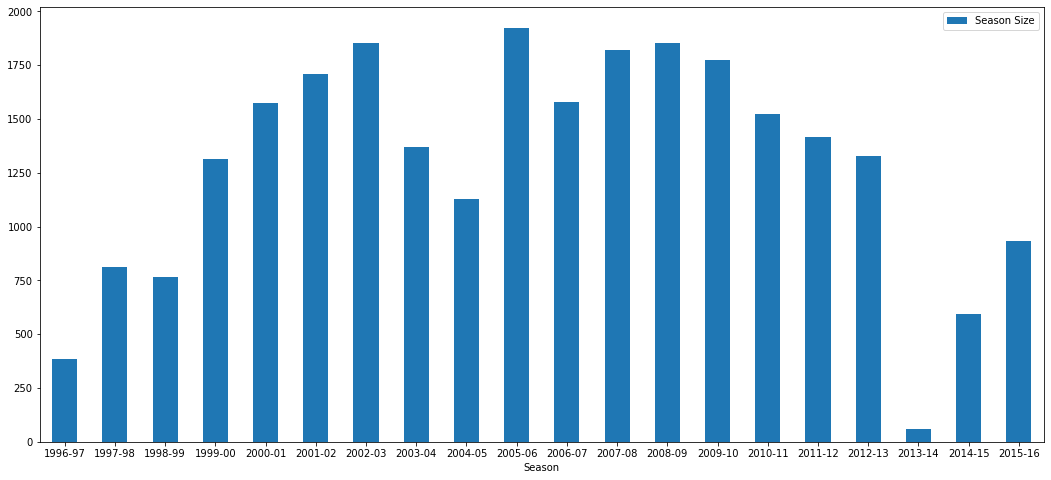

In [7]:
df2 = pd.DataFrame({'Season': seasons, 'Season Size': seasons_sizes_list})
ax = df2.plot.bar(x='Season', y='Season Size', rot=0, figsize=(18,8))